In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython

In [2]:
def LinkwitzRiley24dB(fc, sr):
    omega = 2 * pi * fc / sr
    
    sineOmega = np.sin(omega)
    cosinePmega = np.cos(omega)
    alpha = sineOmega * np.sqrt(2) / 2
    a0 = 1 + alpha
    
    A1 = -( 2 * cosinePmega) / a0
    A2 = (1 - alpha) / a0
    B1 = (1 - cosinePmega) / a0 
    B0 = B1 / 2
    B2 = B0
    
    b_lp = np.convolve([B0, B1, B2], [B0, B1, B2])
    a_lp = np.convolve([1, A1, A2], [1, A1, A2])
    
    A1 = -(2 * cosinePmega) / a0
    A2 = (1 - alpha) / a0
    B1 = -(1 + cosinePmega) / a0
    B0 = -B1 / 2
    B2 = B0
    
    b_hp = np.convolve([B0, B1, B2], [B0, B1, B2])
    a_hp = np.convolve([1, A1, A2], [1, A1, A2])
    
    return b_lp, a_lp, b_hp, a_hp

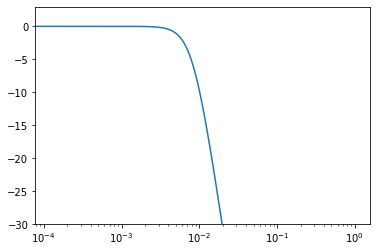

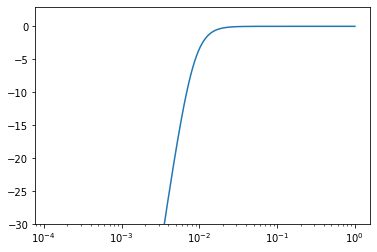

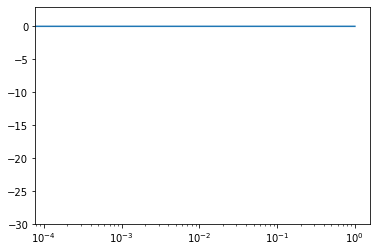

In [3]:
b_lp, a_lp, b_hp, a_hp = LinkwitzRiley24dB(200, 48000)

w, h1 = signal.freqz(b_lp, a_lp, 8192)
amplitude = 20 * np.log10(abs(h1))
angle = np.angle(h1)
plt.plot(w/max(w), amplitude)
plt.xscale('log')
plt.ylim(-30, 3)
plt.show()

w, h2 = signal.freqz(b_hp, a_hp, 8192)
amplitude = 20 * np.log10(abs(h2))
angle = np.angle(h2)
plt.plot(w/max(w), amplitude)
plt.xscale('log')
plt.ylim(-30, 3)
plt.show()

amplitude = 20 * np.log10(abs(h1+h2))
angle = np.angle(h1+h2)
plt.plot(w/max(w), amplitude)
plt.xscale('log')
plt.ylim(-30, 3)
plt.show()